<a href="https://colab.research.google.com/github/crislainesc/Aprendizado-de-Maquina-na-Pratica/blob/Atividade/CNN_Raio_x_De_Torax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Raio-x de Tórax (Pneumonia)**



*   [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
*   Dataset com imagens de raio-x de tórax
*   Dois tipos de raio-x:
    *  Normal
    *  Pneumonia




In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**1. Importando bibliotecas**

In [2]:
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score

from keras import preprocessing
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

**2. Lendo imagens**

Leitura de uma imagem

In [3]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Semana 6/test/NORMAL/IM-0001-0001.jpeg')

In [4]:
img.shape

(1317, 1857, 3)

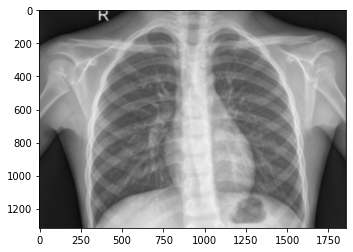

In [5]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [6]:
pixels = np.asarray(img)
pixels

array([[[ 0,  0,  0],
        [32, 32, 32],
        [33, 33, 33],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [ 0,  0,  0]]], dtype=uint8)

**Lendo todas as imagens**

In [7]:
input_dir = ('/content/drive/My Drive/Colab Notebooks/Semana 6/')

In [8]:
classes = {'NORMAL':0, 'PNEUMONIA':1}
def ler_dataset(tipo):
  X = []
  y = []
  qtd = 300 if tipo == 'train' else 200
  for pasta in os.listdir(input_dir+tipo+'/'):
    print(pasta)
    for img_file in os.listdir(input_dir+tipo+'/'+pasta+'/')[:qtd]:
      img = cv2.imread(input_dir+tipo+'/'+pasta+'/'+img_file)
      img = cv2.resize(img, (50, 100)) 
      X.append(img)
      y.append(classes[pasta])
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y

In [9]:
X_treino,y_treino = ler_dataset('train')

PNEUMONIA
NORMAL


In [10]:
X_treino.shape

(600, 100, 50, 3)

In [24]:
y_treino.shape

(600, 2)

In [13]:
X_test, y_test = ler_dataset('test')

PNEUMONIA
NORMAL


In [14]:
X_test.shape

(400, 100, 50, 3)

In [25]:
y_test.shape

(400, 2)

In [16]:
y_treino = to_categorical(y_treino, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

**3. Re-escala dos Dados**

In [17]:
X_treino = X_treino/200
X_test = X_test/200

**4. Definindo CNN**

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (50, 100, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [19]:
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

In [20]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 100, 32)       2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 100, 32)       25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 100, 32)       25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 50, 64)        3

In [22]:
model.fit(X_treino, y_treino, epochs = 1, verbose = 1)

19/19 [==============================] - 49s 3s/step - loss: 0.7854 - accuracy: 0.4967


**5. Avaliando modelo**

In [23]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 7s 564ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931482553482056, 0.5]

**6. Análise e interpretação dos resultados**

As imagens do dataset precisaram ser redimensionadas para diminuição do custo computacional e o por se tratar de capturas cujo formato pende para retangular a dimensão escolhida foi: (50,100).

O número de imagens foi reduzido para obtenção de um modelo mais eficiente, visto que, com um número elevado de imagens o custo de processamento seria alto

Contudo, com 300 imagens o modelo mostrou uma acurácia de 0.50. O total de parâmetros do modelo foi de: 2.875.138 e nenhum parâmetro ficou isento de treinamento.